In [37]:
import pandas as pd
from scipy.integrate import simps


In [38]:
df_energy_ecae = pd.read_csv("./energon/ECAE.csv", index_col=False)
df_energy_race = pd.read_csv("./energon/RACE.csv", index_col=False)
df_energy_lstm = pd.read_csv("./energon/LSTM.csv", index_col=False)

# remove lines containing -1 values in any column
df_energy_ecae = df_energy_ecae[df_energy_ecae.ge(0).all(axis=1)]
df_energy_race = df_energy_race[df_energy_race.ge(0).all(axis=1)]
df_energy_lstm = df_energy_lstm[df_energy_lstm.ge(0).all(axis=1)]


In [39]:
df_energy_ecae.columns

Index(['energon_total_in_power_mW', 'energon_cpu_in_power_mW',
       'energon_gpu_in_power_mW', 'energon_cpu_total_usage_percentage',
       'energon_gpu_total_usage_percentage', 'energon_ram_used_percentage',
       'timestamp'],
      dtype='object')

In [40]:
df_time_lstm_gpu_S1 = pd.read_csv("./red_ai/gpu/lstm_pytorch_model_performance_FD001.csv", index_col=False)
df_time_lstm_gpu_S2 = pd.read_csv("./red_ai/gpu/lstm_pytorch_model_performance_FD002.csv", index_col=False)
df_time_lstm_gpu_S3 = pd.read_csv("./red_ai/gpu/lstm_pytorch_model_performance_FD003.csv", index_col=False)
df_time_lstm_gpu_S4 = pd.read_csv("./red_ai/gpu/lstm_pytorch_model_performance_FD004.csv", index_col=False)

df_time_lstm_cpu_S1 = pd.read_csv("./red_ai/cpu/lstm_pytorch_model_performance_FD001.csv", index_col=False)
df_time_lstm_cpu_S2 = pd.read_csv("./red_ai/cpu/lstm_pytorch_model_performance_FD002.csv", index_col=False)
df_time_lstm_cpu_S3 = pd.read_csv("./red_ai/cpu/lstm_pytorch_model_performance_FD003.csv", index_col=False)
df_time_lstm_cpu_S4 = pd.read_csv("./red_ai/cpu/lstm_pytorch_model_performance_FD004.csv", index_col=False)

In [41]:
df_time_ecae_S1_1layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/1_rc_layers/FD001_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)
df_time_ecae_S1_2layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/2_rc_layers/FD001_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)

df_time_ecae_S2_1layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/1_rc_layers/FD002_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)
df_time_ecae_S2_2layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/2_rc_layers/FD002_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)

df_time_ecae_S3_1layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/1_rc_layers/FD003_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)
df_time_ecae_S3_2layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/2_rc_layers/FD003_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)

df_time_ecae_S4_1layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/1_rc_layers/FD004_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)
df_time_ecae_S4_2layers = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/cae_pytorch_rc_mlp_aggregated_prediction_val_split_withMAC/2_rc_layers/FD004_cae_pytorch_rc_pred_results_val_split.csv", index_col=False)

In [42]:
df_time_race_S1_step1_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/race_free_mlp_aggregated_prediction_val_split_step1/1_layers/FD001_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S1_step1_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/race_free_mlp_aggregated_prediction_val_split_step1/2_layers/FD001_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S1_step2_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/race_free_mlp_aggregated_prediction_val_split_step2/1_layers/FD001_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S1_step2_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD001/race_free_mlp_aggregated_prediction_val_split_step2/2_layers/FD001_prediction_results_loadedHPs.csv", index_col=False)

df_time_race_S2_step1_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/race_free_mlp_aggregated_prediction_val_split_step1/1_layers/FD002_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S2_step1_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/race_free_mlp_aggregated_prediction_val_split_step1/2_layers/FD002_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S2_step2_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/race_free_mlp_aggregated_prediction_val_split_step2/1_layers/FD002_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S2_step2_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD002/race_free_mlp_aggregated_prediction_val_split_step2/2_layers/FD002_prediction_results_loadedHPs.csv", index_col=False)

df_time_race_S3_step1_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/race_free_mlp_aggregated_prediction_val_split_step1/1_layers/FD003_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S3_step1_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/race_free_mlp_aggregated_prediction_val_split_step1/2_layers/FD003_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S3_step2_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/race_free_mlp_aggregated_prediction_val_split_step2/1_layers/FD003_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S3_step2_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD003/race_free_mlp_aggregated_prediction_val_split_step2/2_layers/FD003_prediction_results_loadedHPs.csv", index_col=False)

df_time_race_S4_step1_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/race_free_mlp_aggregated_prediction_val_split_step1/1_layers/FD004_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S4_step1_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/race_free_mlp_aggregated_prediction_val_split_step1/2_layers/FD004_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S4_step2_layer1 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/race_free_mlp_aggregated_prediction_val_split_step2/1_layers/FD004_prediction_results_loadedHPs.csv", index_col=False)
df_time_race_S4_step2_layer2 = pd.read_csv("./time_only/NASA_results_val_selected_hps_FD004/race_free_mlp_aggregated_prediction_val_split_step2/2_layers/FD004_prediction_results_loadedHPs.csv", index_col=False)

In [43]:
df_time_race_S1_step2_layer2["final_mlp_training_start_time"][0]

1748021358.0308893

In [44]:
def getResourceUsage(df_energy, startTime, endTime):
    # select portion from df_energy with timestamp between start_train and end_train
    df_energy_filtered = df_energy[(df_energy["timestamp"] >= startTime) & (df_energy["timestamp"] <= endTime)]

    # calculate the mean and std of each column
    cpu_usage_percentage_mean = df_energy_filtered["energon_cpu_total_usage_percentage"].mean()
    cpu_usage_percentage_std = df_energy_filtered["energon_cpu_total_usage_percentage"].std()
    gpu_usage_percentage_mean = df_energy_filtered["energon_gpu_total_usage_percentage"].mean()
    gpu_usage_percentage_std = df_energy_filtered["energon_gpu_total_usage_percentage"].std()
    memory_usage_mean = df_energy_filtered["energon_ram_used_percentage"].mean()
    memory_usage_std = df_energy_filtered["energon_ram_used_percentage"].std()
    total_power = df_energy_filtered["energon_total_in_power_mW"].mean()
    max_cpu_power = df_energy_filtered["energon_cpu_in_power_mW"].max()
    max_gpu_power = df_energy_filtered["energon_gpu_in_power_mW"].max()

    # calculate the energy consumption using simpson's rule
    total_energy_consumption = simps(df_energy_filtered["energon_total_in_power_mW"], df_energy_filtered["timestamp"]) / 1000  # in Joules
    cpu_energy_consumption = simps(df_energy_filtered["energon_cpu_in_power_mW"], df_energy_filtered["timestamp"]) / 1000
    gpu_energy_consumption = simps(df_energy_filtered["energon_gpu_in_power_mW"], df_energy_filtered["timestamp"]) / 1000

    return {
        "tot_time": endTime - startTime,
        "cpu_usage_percentage_mean": cpu_usage_percentage_mean,
        "cpu_usage_percentage_std": cpu_usage_percentage_std,
        "gpu_usage_percentage_mean": gpu_usage_percentage_mean,
        "gpu_usage_percentage_std": gpu_usage_percentage_std,
        "memory_usage_mean": memory_usage_mean,
        "memory_usage_std": memory_usage_std,
        "max_cpu_power": max_cpu_power,
        "max_gpu_power": max_gpu_power,
        "total_energy_consumption": total_energy_consumption,
        "cpu_energy_consumption": cpu_energy_consumption,
        "gpu_energy_consumption": gpu_energy_consumption
    }



## LSTM

In [45]:
getResourceUsage(df_energy_lstm, df_time_lstm_gpu_S1["startTrainTime"][0], df_time_lstm_gpu_S1["endTrainTime"][0])

{'tot_time': 81.51510167121887,
 'cpu_usage_percentage_mean': 11.230465995942424,
 'cpu_usage_percentage_std': 1.282430235548103,
 'gpu_usage_percentage_mean': 51.160493827160494,
 'gpu_usage_percentage_std': 9.127743239652942,
 'memory_usage_mean': 48.49805948516242,
 'memory_usage_std': 0.1194908723957128,
 'max_cpu_power': 75.06250900000305,
 'max_gpu_power': 102.98,
 'total_energy_consumption': 8.668004122634526,
 'cpu_energy_consumption': 3.742445778144791,
 'gpu_energy_consumption': 4.925558344489733}

In [46]:
getResourceUsage(df_energy_lstm, df_time_lstm_cpu_S1["startTrainTime"][0], df_time_lstm_cpu_S1["endTrainTime"][0])

{'tot_time': 162.24001455307007,
 'cpu_usage_percentage_mean': 54.423279459888825,
 'cpu_usage_percentage_std': 3.21654469868886,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 51.43104316844651,
 'memory_usage_std': 0.07558943984364916,
 'max_cpu_power': 96.66106299999956,
 'max_gpu_power': 96.81,
 'total_energy_consumption': 11.034921872213426,
 'cpu_energy_consumption': 9.854336707633877,
 'gpu_energy_consumption': 1.1805851645795506}

## ECAE

In [47]:
getResourceUsage(df_energy_ecae, df_time_ecae_S1_1layers["start_final_mlp_train"][0], df_time_ecae_S1_1layers["end_final_mlp_train"][0])

{'tot_time': 18.624505758285522,
 'cpu_usage_percentage_mean': 91.13636769597986,
 'cpu_usage_percentage_std': 26.12368394536146,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 48.92047425248209,
 'memory_usage_std': 0.04258176563950617,
 'max_cpu_power': 142.14177299999983,
 'max_gpu_power': 43.0,
 'total_energy_consumption': 2.0937515545530685,
 'cpu_energy_consumption': 1.5829601859453892,
 'gpu_energy_consumption': 0.5107913686076799}

In [48]:
getResourceUsage(df_energy_ecae, df_time_ecae_S1_2layers["start_final_mlp_train"][0], df_time_ecae_S1_2layers["end_final_mlp_train"][0])

{'tot_time': 24.34188199043274,
 'cpu_usage_percentage_mean': 92.94224503521725,
 'cpu_usage_percentage_std': 23.8849895219189,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 48.964812233346,
 'memory_usage_std': 0.0330206070665948,
 'max_cpu_power': 142.13037600000098,
 'max_gpu_power': 43.24,
 'total_energy_consumption': 2.7536147383289955,
 'cpu_energy_consumption': 2.17816382123842,
 'gpu_energy_consumption': 0.5754509170905748}

## RACE

In [49]:
getResourceUsage(df_energy_race, df_time_race_S1_step1_layer1["final_mlp_training_start_time"][0], df_time_race_S1_step1_layer1["final_mlp_training_end_time"][0])

{'tot_time': 39.49541735649109,
 'cpu_usage_percentage_mean': 95.10327123326157,
 'cpu_usage_percentage_std': 19.38374154518355,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.578725504999895,
 'memory_usage_std': 0.033687225505231386,
 'max_cpu_power': 142.13355,
 'max_gpu_power': 11.57,
 'total_energy_consumption': 3.770246317915505,
 'cpu_energy_consumption': 3.5388747169514354,
 'gpu_energy_consumption': 0.2313716009640694}

In [50]:
getResourceUsage(df_energy_race, df_time_race_S1_step1_layer2["final_mlp_training_start_time"][0], df_time_race_S1_step1_layer2["final_mlp_training_end_time"][0])

{'tot_time': 18.70447301864624,
 'cpu_usage_percentage_mean': 90.83536506333328,
 'cpu_usage_percentage_std': 26.4571461324769,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.55335179782141,
 'memory_usage_std': 0.050867197479796046,
 'max_cpu_power': 142.1284540000015,
 'max_gpu_power': 9.27,
 'total_energy_consumption': 1.6802279217453202,
 'cpu_energy_consumption': 1.573939579398175,
 'gpu_energy_consumption': 0.1062883423471451}

In [51]:
getResourceUsage(df_energy_race, df_time_race_S1_step2_layer1["final_mlp_training_start_time"][0], df_time_race_S1_step2_layer1["final_mlp_training_end_time"][0])


{'tot_time': 39.345261335372925,
 'cpu_usage_percentage_mean': 97.7664611887627,
 'cpu_usage_percentage_std': 13.588122684951928,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.553394058820956,
 'memory_usage_std': 0.02673427733609445,
 'max_cpu_power': 142.14021700000012,
 'max_gpu_power': 9.36,
 'total_energy_consumption': 3.740584028959255,
 'cpu_energy_consumption': 3.5177143191122813,
 'gpu_energy_consumption': 0.22286970984697338}

In [52]:
getResourceUsage(df_energy_race, df_time_race_S1_step2_layer2["final_mlp_training_start_time"][0], df_time_race_S1_step2_layer2["final_mlp_training_end_time"][0])


{'tot_time': 77.58778548240662,
 'cpu_usage_percentage_mean': 96.64154144428434,
 'cpu_usage_percentage_std': 15.700198602843425,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.55518150138914,
 'memory_usage_std': 0.03723768729287233,
 'max_cpu_power': 142.13171800000055,
 'max_gpu_power': 11.29,
 'total_energy_consumption': 7.555326793676929,
 'cpu_energy_consumption': 7.109199340371208,
 'gpu_energy_consumption': 0.4461274533057213}

### Train time

In [53]:
avg_train_time_lstm_gpu = []
avg_train_time_lstm_cpu = []
avg_train_time_ecae_1layers_mlp = []
avg_train_time_ecae_1layers_ae = []
avg_train_time_ecae_2layers_mlp = []
avg_train_time_ecae_2layers_ae = []
avg_train_time_race_step1_1layers = []
avg_train_time_race_step1_2layers = []
avg_train_time_race_step2_1layers = []
avg_train_time_race_step2_2layers = []

avg_train_time_lstm_gpu.append(df_time_lstm_gpu_S1["endTrainTime"][0] - df_time_lstm_gpu_S1["startTrainTime"][0])
avg_train_time_lstm_gpu.append(df_time_lstm_gpu_S2["endTrainTime"][0] - df_time_lstm_gpu_S2["startTrainTime"][0])
avg_train_time_lstm_gpu.append(df_time_lstm_gpu_S3["endTrainTime"][0] - df_time_lstm_gpu_S3["startTrainTime"][0])
avg_train_time_lstm_gpu.append(df_time_lstm_gpu_S4["endTrainTime"][0] - df_time_lstm_gpu_S4["startTrainTime"][0])
avg_train_time_lstm_cpu.append(df_time_lstm_cpu_S1["endTrainTime"][0] - df_time_lstm_cpu_S1["startTrainTime"][0])
avg_train_time_lstm_cpu.append(df_time_lstm_cpu_S2["endTrainTime"][0] - df_time_lstm_cpu_S2["startTrainTime"][0])
avg_train_time_lstm_cpu.append(df_time_lstm_cpu_S3["endTrainTime"][0] - df_time_lstm_cpu_S3["startTrainTime"][0])
avg_train_time_lstm_cpu.append(df_time_lstm_cpu_S4["endTrainTime"][0] - df_time_lstm_cpu_S4["startTrainTime"][0])

avg_train_time_ecae_1layers_mlp.append(df_time_ecae_S1_1layers["end_final_mlp_train"][0] - df_time_ecae_S1_1layers["start_final_mlp_train"][0])
avg_train_time_ecae_1layers_mlp.append(df_time_ecae_S2_1layers["end_final_mlp_train"][0] - df_time_ecae_S2_1layers["start_final_mlp_train"][0])
avg_train_time_ecae_1layers_mlp.append(df_time_ecae_S3_1layers["end_final_mlp_train"][0] - df_time_ecae_S3_1layers["start_final_mlp_train"][0])
avg_train_time_ecae_1layers_mlp.append(df_time_ecae_S4_1layers["end_final_mlp_train"][0] - df_time_ecae_S4_1layers["start_final_mlp_train"][0])

avg_train_time_ecae_1layers_ae.append(df_time_ecae_S1_1layers["end_cae_training_time"][0] - df_time_ecae_S1_1layers["start_cae_training_time"][0])
avg_train_time_ecae_1layers_ae.append(df_time_ecae_S2_1layers["end_cae_training_time"][0] - df_time_ecae_S2_1layers["start_cae_training_time"][0])
avg_train_time_ecae_1layers_ae.append(df_time_ecae_S3_1layers["end_cae_training_time"][0] - df_time_ecae_S3_1layers["start_cae_training_time"][0])
avg_train_time_ecae_1layers_ae.append(df_time_ecae_S4_1layers["end_cae_training_time"][0] - df_time_ecae_S4_1layers["start_cae_training_time"][0])

avg_train_time_ecae_2layers_mlp.append(df_time_ecae_S1_2layers["end_final_mlp_train"][0] - df_time_ecae_S1_2layers["start_final_mlp_train"][0]) 
avg_train_time_ecae_2layers_mlp.append(df_time_ecae_S2_2layers["end_final_mlp_train"][0] - df_time_ecae_S2_2layers["start_final_mlp_train"][0]) 
avg_train_time_ecae_2layers_mlp.append(df_time_ecae_S3_2layers["end_final_mlp_train"][0] - df_time_ecae_S3_2layers["start_final_mlp_train"][0]) 
avg_train_time_ecae_2layers_mlp.append(df_time_ecae_S4_2layers["end_final_mlp_train"][0] - df_time_ecae_S4_2layers["start_final_mlp_train"][0]) 

avg_train_time_ecae_2layers_ae.append(df_time_ecae_S1_2layers["end_cae_training_time"][0] - df_time_ecae_S1_2layers["start_cae_training_time"][0])
avg_train_time_ecae_2layers_ae.append(df_time_ecae_S2_2layers["end_cae_training_time"][0] - df_time_ecae_S2_2layers["start_cae_training_time"][0])
avg_train_time_ecae_2layers_ae.append(df_time_ecae_S3_2layers["end_cae_training_time"][0] - df_time_ecae_S3_2layers["start_cae_training_time"][0])
avg_train_time_ecae_2layers_ae.append(df_time_ecae_S4_2layers["end_cae_training_time"][0] - df_time_ecae_S4_2layers["start_cae_training_time"][0])

avg_train_time_race_step1_1layers.append(df_time_race_S1_step1_layer1["final_mlp_training_end_time"][0] - df_time_race_S1_step1_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step1_1layers.append(df_time_race_S2_step1_layer1["final_mlp_training_end_time"][0] - df_time_race_S2_step1_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step1_1layers.append(df_time_race_S3_step1_layer1["final_mlp_training_end_time"][0] - df_time_race_S3_step1_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step1_1layers.append(df_time_race_S4_step1_layer1["final_mlp_training_end_time"][0] - df_time_race_S4_step1_layer1["final_mlp_training_start_time"][0])
                                         
avg_train_time_race_step1_2layers.append(df_time_race_S1_step1_layer2["final_mlp_training_end_time"][0] - df_time_race_S1_step1_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step1_2layers.append(df_time_race_S2_step1_layer2["final_mlp_training_end_time"][0] - df_time_race_S2_step1_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step1_2layers.append(df_time_race_S3_step1_layer2["final_mlp_training_end_time"][0] - df_time_race_S3_step1_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step1_2layers.append(df_time_race_S4_step1_layer2["final_mlp_training_end_time"][0] - df_time_race_S4_step1_layer2["final_mlp_training_start_time"][0])

avg_train_time_race_step2_1layers.append(df_time_race_S1_step2_layer1["final_mlp_training_end_time"][0] - df_time_race_S1_step2_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step2_1layers.append(df_time_race_S2_step2_layer1["final_mlp_training_end_time"][0] - df_time_race_S2_step2_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step2_1layers.append(df_time_race_S3_step2_layer1["final_mlp_training_end_time"][0] - df_time_race_S3_step2_layer1["final_mlp_training_start_time"][0])
avg_train_time_race_step2_1layers.append(df_time_race_S4_step2_layer1["final_mlp_training_end_time"][0] - df_time_race_S4_step2_layer1["final_mlp_training_start_time"][0])
                                         
avg_train_time_race_step2_2layers.append(df_time_race_S1_step2_layer2["final_mlp_training_end_time"][0] - df_time_race_S1_step2_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step2_2layers.append(df_time_race_S2_step2_layer2["final_mlp_training_end_time"][0] - df_time_race_S2_step2_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step2_2layers.append(df_time_race_S3_step2_layer2["final_mlp_training_end_time"][0] - df_time_race_S3_step2_layer2["final_mlp_training_start_time"][0])
avg_train_time_race_step2_2layers.append(df_time_race_S4_step2_layer2["final_mlp_training_end_time"][0] - df_time_race_S4_step2_layer2["final_mlp_training_start_time"][0])
                                         

In [54]:
avg_train_time_race_step2_2layers

[77.58778548240662, 54.26797127723694, 36.12317180633545, 99.46831011772156]

### Pred time

In [55]:
avg_pred_time_lstm_gpu = []
avg_pred_time_lstm_cpu = []
avg_pred_time_ecae_1layers = []
avg_pred_time_ecae_2layers = []
avg_pred_time_race_step1_1layers = []
avg_pred_time_race_step1_2layers = []
avg_pred_time_race_step2_1layers = []
avg_pred_time_race_step2_2layers = []

avg_pred_time_lstm_gpu.append(df_time_lstm_gpu_S1["endPredictTime"][0] - df_time_lstm_gpu_S1["startPredictTime"][0])
avg_pred_time_lstm_gpu.append(df_time_lstm_gpu_S2["endPredictTime"][0] - df_time_lstm_gpu_S2["startPredictTime"][0])
avg_pred_time_lstm_gpu.append(df_time_lstm_gpu_S3["endPredictTime"][0] - df_time_lstm_gpu_S3["startPredictTime"][0])
avg_pred_time_lstm_gpu.append(df_time_lstm_gpu_S4["endPredictTime"][0] - df_time_lstm_gpu_S4["startPredictTime"][0])
avg_pred_time_lstm_cpu.append(df_time_lstm_cpu_S1["endPredictTime"][0] - df_time_lstm_cpu_S1["startPredictTime"][0])
avg_pred_time_lstm_cpu.append(df_time_lstm_cpu_S2["endPredictTime"][0] - df_time_lstm_cpu_S2["startPredictTime"][0])
avg_pred_time_lstm_cpu.append(df_time_lstm_cpu_S3["endPredictTime"][0] - df_time_lstm_cpu_S3["startPredictTime"][0])
avg_pred_time_lstm_cpu.append(df_time_lstm_cpu_S4["endPredictTime"][0] - df_time_lstm_cpu_S4["startPredictTime"][0])

avg_pred_time_ecae_1layers.append(df_time_ecae_S1_1layers["end_final_mlp_predict_test"][0] - df_time_ecae_S1_1layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_1layers.append(df_time_ecae_S2_1layers["end_final_mlp_predict_test"][0] - df_time_ecae_S2_1layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_1layers.append(df_time_ecae_S3_1layers["end_final_mlp_predict_test"][0] - df_time_ecae_S3_1layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_1layers.append(df_time_ecae_S4_1layers["end_final_mlp_predict_test"][0] - df_time_ecae_S4_1layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_2layers.append(df_time_ecae_S1_2layers["end_final_mlp_predict_test"][0] - df_time_ecae_S1_2layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_2layers.append(df_time_ecae_S2_2layers["end_final_mlp_predict_test"][0] - df_time_ecae_S2_2layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_2layers.append(df_time_ecae_S3_2layers["end_final_mlp_predict_test"][0] - df_time_ecae_S3_2layers["start_final_mlp_predict_test"][0])
avg_pred_time_ecae_2layers.append(df_time_ecae_S4_2layers["end_final_mlp_predict_test"][0] - df_time_ecae_S4_2layers["start_final_mlp_predict_test"][0])

avg_pred_time_race_step1_1layers.append(df_time_race_S1_step1_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S1_step1_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_1layers.append(df_time_race_S2_step1_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S2_step1_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_1layers.append(df_time_race_S3_step1_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S3_step1_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_1layers.append(df_time_race_S4_step1_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S4_step1_layer1["final_mlp_prediction_start_time_test"][0])
                                         
avg_pred_time_race_step1_2layers.append(df_time_race_S1_step1_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S1_step1_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_2layers.append(df_time_race_S2_step1_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S2_step1_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_2layers.append(df_time_race_S3_step1_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S3_step1_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step1_2layers.append(df_time_race_S4_step1_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S4_step1_layer2["final_mlp_prediction_start_time_test"][0])

avg_pred_time_race_step2_1layers.append(df_time_race_S1_step2_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S1_step2_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_1layers.append(df_time_race_S2_step2_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S2_step2_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_1layers.append(df_time_race_S3_step2_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S3_step2_layer1["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_1layers.append(df_time_race_S4_step2_layer1["final_mlp_prediction_end_time_test"][0] - df_time_race_S4_step2_layer1["final_mlp_prediction_start_time_test"][0])
                                         
avg_pred_time_race_step2_2layers.append(df_time_race_S1_step2_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S1_step2_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_2layers.append(df_time_race_S2_step2_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S2_step2_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_2layers.append(df_time_race_S3_step2_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S3_step2_layer2["final_mlp_prediction_start_time_test"][0])
avg_pred_time_race_step2_2layers.append(df_time_race_S4_step2_layer2["final_mlp_prediction_end_time_test"][0] - df_time_race_S4_step2_layer2["final_mlp_prediction_start_time_test"][0])
                                         

In [56]:
# parse to numpy arrays
avg_train_time_lstm_gpu = pd.Series(avg_train_time_lstm_gpu).to_numpy()
avg_train_time_lstm_cpu = pd.Series(avg_train_time_lstm_cpu).to_numpy()
avg_train_time_ecae_1layers_mlp = pd.Series(avg_train_time_ecae_1layers_mlp).to_numpy()
avg_train_time_ecae_2layers_mlp = pd.Series(avg_train_time_ecae_2layers_mlp).to_numpy()
avg_train_time_ecae_1layers_ae = pd.Series(avg_train_time_ecae_1layers_ae).to_numpy()
avg_train_time_ecae_2layers_ae = pd.Series(avg_train_time_ecae_2layers_ae).to_numpy()
avg_train_time_race_step1_1layers = pd.Series(avg_train_time_race_step1_1layers).to_numpy()
avg_train_time_race_step1_2layers = pd.Series(avg_train_time_race_step1_2layers).to_numpy()
avg_train_time_race_step2_1layers = pd.Series(avg_train_time_race_step2_1layers).to_numpy()
avg_train_time_race_step2_2layers = pd.Series(avg_train_time_race_step2_2layers).to_numpy()

avg_pred_time_lstm_gpu = pd.Series(avg_pred_time_lstm_gpu).to_numpy()
avg_pred_time_lstm_cpu = pd.Series(avg_pred_time_lstm_cpu).to_numpy()
avg_pred_time_ecae_1layers = pd.Series(avg_pred_time_ecae_1layers).to_numpy()
avg_pred_time_ecae_2layers = pd.Series(avg_pred_time_ecae_2layers).to_numpy()
avg_pred_time_race_step1_1layers = pd.Series(avg_pred_time_race_step1_1layers).to_numpy()
avg_pred_time_race_step1_2layers = pd.Series(avg_pred_time_race_step1_2layers).to_numpy()
avg_pred_time_race_step2_1layers = pd.Series(avg_pred_time_race_step2_1layers).to_numpy()
avg_pred_time_race_step2_2layers = pd.Series(avg_pred_time_race_step2_2layers).to_numpy()

In [57]:
avg_train_time_race_step2_2layers

array([77.58778548, 54.26797128, 36.12317181, 99.46831012])

In [58]:
avg_train_time_race_step1_2layers

array([ 18.70447302, 115.26347423,  25.16750622,  31.35901093])

findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

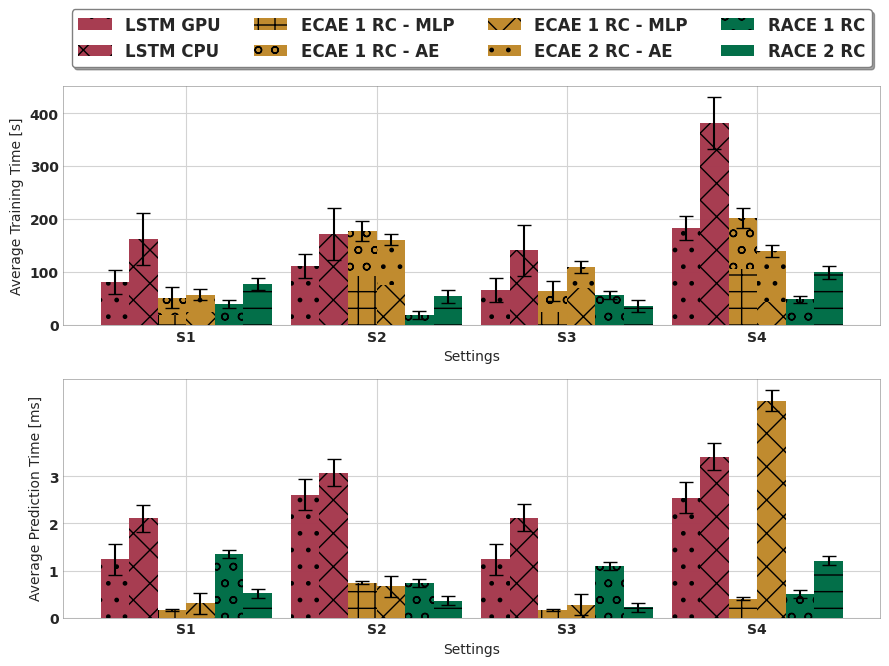

In [ ]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False

colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']
dark_colors = ['#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41', '#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41']
hatchs = [
    ".",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
    "o",
    "-",
    "+",
    "O",
]

# for c in dark_colors:
    # # show color
    # plt.figure(figsize=(1, 1))
    # plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color=c))

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6))
fig.subplots_adjust(hspace=0.5)

settings = ["S1", "S2", "S3", "S4"]

# Air Quality Plot
x = np.arange(len(settings))  # the label locations
width = 0.15  # the width of the bars

d_1_mlp = np.array(avg_train_time_ecae_1layers_mlp)
d_2_mlp = np.array(avg_train_time_ecae_2layers_mlp)
d_1_ae = np.array(avg_train_time_ecae_1layers_ae)
d_2_ae = np.array(avg_train_time_ecae_2layers_ae)

ax1.bar(x - width * 2.5, avg_train_time_lstm_gpu, width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 1.5, avg_train_time_lstm_cpu, width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 0.5, d_1_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[4], alpha=0.99)
ax1.bar(x - width * 0.5, d_1_ae, width, bottom=d_1_mlp, label='ECAE 1 RC - AE', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x + width * 0.5, d_2_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[1], alpha=0.99)
ax1.bar(x + width * 0.5, d_2_ae, width, bottom=d_2_mlp, label='ECAE 2 RC - AE', color=dark_colors[3], hatch=hatchs[0], alpha=0.99)
ax1.bar(x + width * 1.5, avg_train_time_race_step2_1layers, width, label="RACE 1 RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 2.5, avg_train_time_race_step2_2layers, width, label="RACE 2 RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax1.errorbar(x - width * 2.5, avg_train_time_lstm_gpu, yerr=avg_train_time_lstm_gpu.std()/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x - width * 1.5, avg_train_time_lstm_cpu, yerr=avg_train_time_lstm_cpu.std()/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x - width * 0.5, d_1_ae + d_1_mlp, yerr=d_1_mlp.std()/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 0.5, d_2_ae + d_2_mlp, yerr=d_2_mlp.std()/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 1.5, avg_train_time_race_step2_1layers, yerr=avg_train_time_race_step2_1layers.std()/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 2.5, avg_train_time_race_step2_2layers, yerr=avg_train_time_race_step2_2layers.std()/2, fmt='none', ecolor='black', capsize=5)

ax2.bar(x - width * 2.5, avg_pred_time_lstm_gpu, width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 1.5, avg_pred_time_lstm_cpu, width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 0.5, avg_pred_time_ecae_1layers, width, label='ECAE 1 RC', color=dark_colors[3], hatch=hatchs[4], alpha=0.99)
ax2.bar(x + width * 0.5, avg_pred_time_ecae_2layers, width, label='ECAE 2 RC', color=dark_colors[3], hatch=hatchs[1], alpha=0.99)
ax2.bar(x + width * 1.5, avg_pred_time_race_step2_1layers, width, label="RACE 1 RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)  
ax2.bar(x + width * 2.5, avg_pred_time_race_step2_2layers, width, label="RACE 2 RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

ax2.errorbar(x - width * 2.5, avg_pred_time_lstm_gpu, yerr=avg_pred_time_lstm_gpu.std()/2, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x - width * 1.5, avg_pred_time_lstm_cpu, yerr=avg_pred_time_lstm_cpu.std()/2, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x - width * 0.5, avg_pred_time_ecae_1layers, yerr=avg_pred_time_ecae_1layers.std()/8, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x + width * 0.5, avg_pred_time_ecae_2layers, yerr=avg_pred_time_ecae_2layers.std()/8, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x + width * 1.5, avg_pred_time_race_step2_1layers, yerr=avg_pred_time_race_step2_1layers.std()/4, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x + width * 2.5, avg_pred_time_race_step2_2layers, yerr=avg_pred_time_race_step2_2layers.std()/4, fmt='none', ecolor='black', capsize=5)

ax1.set_xticks(x)
ax1.set_xticklabels(settings)
ax1.set_xlabel('Settings')
ax1.set_ylabel('Average Training Time [s]')

ax2.set_xticks(x)
ax2.set_xticklabels(settings)
ax2.set_xlabel('Settings')
ax2.set_ylabel('Average Prediction Time [ms]')
ax2.set_yticks([0, 0.001, 0.002, 0.003])
ax2.set_yticklabels([0, 1, 2, 3])

# tight layout
plt.tight_layout()
ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=True, ncol=4)


# save as pdf
fig.savefig("nasa_average_train_pred_time.pdf", bbox_inches='tight', dpi=300)

# show legend
# ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

In [60]:
avg_train_time_race_step2_2layers

array([77.58778548, 54.26797128, 36.12317181, 99.46831012])

### ENERGY AND RESOURCES

In [61]:
resources_LSTM_S1_gpu = getResourceUsage(df_energy_lstm, df_time_lstm_gpu_S1["startTrainTime"][0], df_time_lstm_gpu_S1["endTrainTime"][0])
resources_LSTM_S2_gpu = getResourceUsage(df_energy_lstm, df_time_lstm_gpu_S2["startTrainTime"][0], df_time_lstm_gpu_S2["endTrainTime"][0])
resources_LSTM_S3_gpu = getResourceUsage(df_energy_lstm, df_time_lstm_gpu_S3["startTrainTime"][0], df_time_lstm_gpu_S3["endTrainTime"][0])
resources_LSTM_S4_gpu = getResourceUsage(df_energy_lstm, df_time_lstm_gpu_S4["startTrainTime"][0], df_time_lstm_gpu_S4["endTrainTime"][0])

resources_LSTM_S1_cpu = getResourceUsage(df_energy_lstm, df_time_lstm_cpu_S1["startTrainTime"][0], df_time_lstm_cpu_S1["endTrainTime"][0])
resources_LSTM_S2_cpu = getResourceUsage(df_energy_lstm, df_time_lstm_cpu_S2["startTrainTime"][0], df_time_lstm_cpu_S2["endTrainTime"][0])
resources_LSTM_S3_cpu = getResourceUsage(df_energy_lstm, df_time_lstm_cpu_S3["startTrainTime"][0], df_time_lstm_cpu_S3["endTrainTime"][0])
resources_LSTM_S4_cpu = getResourceUsage(df_energy_lstm, df_time_lstm_cpu_S4["startTrainTime"][0], df_time_lstm_cpu_S4["endTrainTime"][0])

resources_ECAE_S1_1layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S1_1layers["start_final_mlp_train"][0], df_time_ecae_S1_1layers["end_final_mlp_train"][0])
resources_ECAE_S1_2layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S1_2layers["start_final_mlp_train"][0], df_time_ecae_S1_2layers["end_final_mlp_train"][0])
resources_ECAE_S2_1layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S2_1layers["start_final_mlp_train"][0], df_time_ecae_S2_1layers["end_final_mlp_train"][0])
resources_ECAE_S2_2layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S2_2layers["start_final_mlp_train"][0], df_time_ecae_S2_2layers["end_final_mlp_train"][0])
resources_ECAE_S3_1layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S3_1layers["start_final_mlp_train"][0], df_time_ecae_S3_1layers["end_final_mlp_train"][0])
resources_ECAE_S3_2layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S3_2layers["start_final_mlp_train"][0], df_time_ecae_S3_2layers["end_final_mlp_train"][0])
resources_ECAE_S4_1layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S4_1layers["start_final_mlp_train"][0], df_time_ecae_S4_1layers["end_final_mlp_train"][0])
resources_ECAE_S4_2layers_mlp = getResourceUsage(df_energy_ecae, df_time_ecae_S4_2layers["start_final_mlp_train"][0], df_time_ecae_S4_2layers["end_final_mlp_train"][0])

resources_ECAE_S1_1layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S1_1layers["start_cae_training_time"][0], df_time_ecae_S1_1layers["end_cae_training_time"][0])
resources_ECAE_S1_2layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S1_2layers["start_cae_training_time"][0], df_time_ecae_S1_2layers["end_cae_training_time"][0])
resources_ECAE_S2_1layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S2_1layers["start_cae_training_time"][0], df_time_ecae_S2_1layers["end_cae_training_time"][0])
resources_ECAE_S2_2layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S2_2layers["start_cae_training_time"][0], df_time_ecae_S2_2layers["end_cae_training_time"][0])
resources_ECAE_S3_1layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S3_1layers["start_cae_training_time"][0], df_time_ecae_S3_1layers["end_cae_training_time"][0])
resources_ECAE_S3_2layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S3_2layers["start_cae_training_time"][0], df_time_ecae_S3_2layers["end_cae_training_time"][0])
resources_ECAE_S4_1layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S4_1layers["start_cae_training_time"][0], df_time_ecae_S4_1layers["end_cae_training_time"][0])
resources_ECAE_S4_2layers_ae = getResourceUsage(df_energy_ecae, df_time_ecae_S4_2layers["start_cae_training_time"][0], df_time_ecae_S4_2layers["end_cae_training_time"][0])

resources_RACE_S1_step2_layer1 = getResourceUsage(df_energy_race, df_time_race_S1_step2_layer1["final_mlp_training_start_time"][0], df_time_race_S1_step2_layer1["final_mlp_training_end_time"][0])
resources_RACE_S1_step2_layer2 = getResourceUsage(df_energy_race, df_time_race_S1_step2_layer2["final_mlp_training_start_time"][0], df_time_race_S1_step2_layer2["final_mlp_training_end_time"][0])
resources_RACE_S2_step2_layer1 = getResourceUsage(df_energy_race, df_time_race_S2_step2_layer1["final_mlp_training_start_time"][0], df_time_race_S2_step2_layer1["final_mlp_training_end_time"][0])
resources_RACE_S2_step2_layer2 = getResourceUsage(df_energy_race, df_time_race_S2_step2_layer2["final_mlp_training_start_time"][0], df_time_race_S2_step2_layer2["final_mlp_training_end_time"][0])
resources_RACE_S3_step2_layer1 = getResourceUsage(df_energy_race, df_time_race_S3_step2_layer1["final_mlp_training_start_time"][0], df_time_race_S3_step2_layer1["final_mlp_training_end_time"][0])
resources_RACE_S3_step2_layer2 = getResourceUsage(df_energy_race, df_time_race_S3_step2_layer2["final_mlp_training_start_time"][0], df_time_race_S3_step2_layer2["final_mlp_training_end_time"][0])
resources_RACE_S4_step2_layer1 = getResourceUsage(df_energy_race, df_time_race_S4_step2_layer1["final_mlp_training_start_time"][0], df_time_race_S4_step2_layer1["final_mlp_training_end_time"][0])
resources_RACE_S4_step2_layer2 = getResourceUsage(df_energy_race, df_time_race_S4_step2_layer2["final_mlp_training_start_time"][0], df_time_race_S4_step2_layer2["final_mlp_training_end_time"][0])

### cpu usage

In [62]:
avg_cpu_usage_lstm_gpu = []
avg_cpu_usage_lstm_cpu = []
avg_cpu_usage_ecae_1layers_mlp = []
avg_cpu_usage_ecae_1layers_ae = []
avg_cpu_usage_ecae_2layers_mlp = []
avg_cpu_usage_ecae_2layers_ae = []
avg_cpu_usage_race_step2_1layers = []
avg_cpu_usage_race_step2_2layers = []

std_cpu_usage_lstm_gpu = []
std_cpu_usage_lstm_cpu = []
std_cpu_usage_ecae_1layers_mlp = []
std_cpu_usage_ecae_1layers_ae = []
std_cpu_usage_ecae_2layers_mlp = []
std_cpu_usage_ecae_2layers_ae = []
std_cpu_usage_race_step2_1layers = []
std_cpu_usage_race_step2_2layers = []

avg_cpu_usage_lstm_gpu.append(resources_LSTM_S1_gpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_gpu.append(resources_LSTM_S2_gpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_gpu.append(resources_LSTM_S3_gpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_gpu.append(resources_LSTM_S4_gpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_cpu.append(resources_LSTM_S1_cpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_cpu.append(resources_LSTM_S2_cpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_cpu.append(resources_LSTM_S3_cpu["cpu_usage_percentage_mean"])
avg_cpu_usage_lstm_cpu.append(resources_LSTM_S4_cpu["cpu_usage_percentage_mean"])

avg_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["cpu_usage_percentage_mean"])

avg_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["cpu_usage_percentage_mean"])
avg_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["cpu_usage_percentage_mean"])

avg_cpu_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer1["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer1["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer1["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer1["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_2layers.append(resources_RACE_S1_step2_layer2["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_2layers.append(resources_RACE_S2_step2_layer2["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_2layers.append(resources_RACE_S3_step2_layer2["cpu_usage_percentage_mean"])
avg_cpu_usage_race_step2_2layers.append(resources_RACE_S4_step2_layer2["cpu_usage_percentage_mean"])

std_cpu_usage_lstm_gpu.append(resources_LSTM_S1_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_gpu.append(resources_LSTM_S2_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_gpu.append(resources_LSTM_S3_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_gpu.append(resources_LSTM_S4_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_cpu.append(resources_LSTM_S1_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_cpu.append(resources_LSTM_S2_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_cpu.append(resources_LSTM_S3_cpu["cpu_usage_percentage_std"])
std_cpu_usage_lstm_cpu.append(resources_LSTM_S4_cpu["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["cpu_usage_percentage_std"])
std_cpu_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer2["cpu_usage_percentage_std"])
std_cpu_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer2["cpu_usage_percentage_std"])
std_cpu_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer2["cpu_usage_percentage_std"])
std_cpu_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer2["cpu_usage_percentage_std"])

# parse to numpy arrays
avg_cpu_usage_lstm_gpu = pd.Series(avg_cpu_usage_lstm_gpu).to_numpy()
avg_cpu_usage_lstm_cpu = pd.Series(avg_cpu_usage_lstm_cpu).to_numpy()
avg_cpu_usage_ecae_1layers_mlp = pd.Series(avg_cpu_usage_ecae_1layers_mlp).to_numpy()
avg_cpu_usage_ecae_1layers_ae = pd.Series(avg_cpu_usage_ecae_1layers_ae).to_numpy()
avg_cpu_usage_ecae_2layers_mlp = pd.Series(avg_cpu_usage_ecae_2layers_mlp).to_numpy()
avg_cpu_usage_ecae_2layers_ae = pd.Series(avg_cpu_usage_ecae_2layers_ae).to_numpy()
avg_cpu_usage_race_step2_1layers = pd.Series(avg_cpu_usage_race_step2_1layers).to_numpy()
avg_cpu_usage_race_step2_2layers = pd.Series(avg_cpu_usage_race_step2_2layers).to_numpy()

std_cpu_usage_lstm_gpu = pd.Series(std_cpu_usage_lstm_gpu).to_numpy()
std_cpu_usage_lstm_cpu = pd.Series(std_cpu_usage_lstm_cpu).to_numpy()
std_cpu_usage_ecae_1layers_mlp = pd.Series(std_cpu_usage_ecae_1layers_mlp).to_numpy()
std_cpu_usage_ecae_1layers_ae = pd.Series(std_cpu_usage_ecae_1layers_ae).to_numpy()
std_cpu_usage_ecae_2layers_mlp = pd.Series(std_cpu_usage_ecae_2layers_mlp).to_numpy()
std_cpu_usage_ecae_2layers_ae = pd.Series(std_cpu_usage_ecae_2layers_ae).to_numpy()
std_cpu_usage_race_step2_1layers = pd.Series(std_cpu_usage_race_step2_1layers).to_numpy()
std_cpu_usage_race_step2_2layers = pd.Series(std_cpu_usage_race_step2_2layers).to_numpy()

In [63]:
resources_LSTM_S1_cpu

{'tot_time': 162.24001455307007,
 'cpu_usage_percentage_mean': 54.423279459888825,
 'cpu_usage_percentage_std': 3.21654469868886,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 51.43104316844651,
 'memory_usage_std': 0.07558943984364916,
 'max_cpu_power': 96.66106299999956,
 'max_gpu_power': 96.81,
 'total_energy_consumption': 11.034921872213426,
 'cpu_energy_consumption': 9.854336707633877,
 'gpu_energy_consumption': 1.1805851645795506}

### gpu usage

In [64]:
avg_gpu_usage_lstm_gpu = []
avg_gpu_usage_lstm_cpu = []
avg_gpu_usage_ecae_1layers_mlp = []
avg_gpu_usage_ecae_1layers_ae = []
avg_gpu_usage_ecae_2layers_mlp = []
avg_gpu_usage_ecae_2layers_ae = []
avg_gpu_usage_race_step2_1layers = []
avg_gpu_usage_race_step2_2layers = []

std_gpu_usage_lstm_gpu = []
std_gpu_usage_lstm_cpu = []
std_gpu_usage_ecae_1layers_mlp = []
std_gpu_usage_ecae_1layers_ae = []
std_gpu_usage_ecae_2layers_mlp = []
std_gpu_usage_ecae_2layers_ae = []
std_gpu_usage_race_step2_1layers = []
std_gpu_usage_race_step2_2layers = []

avg_gpu_usage_lstm_gpu.append(resources_LSTM_S1_gpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_gpu.append(resources_LSTM_S2_gpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_gpu.append(resources_LSTM_S3_gpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_gpu.append(resources_LSTM_S4_gpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_cpu.append(resources_LSTM_S1_cpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_cpu.append(resources_LSTM_S2_cpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_cpu.append(resources_LSTM_S3_cpu["gpu_usage_percentage_mean"])
avg_gpu_usage_lstm_cpu.append(resources_LSTM_S4_cpu["gpu_usage_percentage_mean"])

avg_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["gpu_usage_percentage_mean"])

avg_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["gpu_usage_percentage_mean"])
avg_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["gpu_usage_percentage_mean"])


avg_gpu_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer1["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer1["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer1["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer1["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_2layers.append(resources_RACE_S1_step2_layer2["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_2layers.append(resources_RACE_S2_step2_layer2["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_2layers.append(resources_RACE_S3_step2_layer2["gpu_usage_percentage_mean"])
avg_gpu_usage_race_step2_2layers.append(resources_RACE_S4_step2_layer2["gpu_usage_percentage_mean"])

std_gpu_usage_lstm_gpu.append(resources_LSTM_S1_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_gpu.append(resources_LSTM_S2_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_gpu.append(resources_LSTM_S3_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_gpu.append(resources_LSTM_S4_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_cpu.append(resources_LSTM_S1_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_cpu.append(resources_LSTM_S2_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_cpu.append(resources_LSTM_S3_cpu["gpu_usage_percentage_std"])
std_gpu_usage_lstm_cpu.append(resources_LSTM_S4_cpu["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["gpu_usage_percentage_std"])
std_gpu_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer2["gpu_usage_percentage_std"])
std_gpu_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer2["gpu_usage_percentage_std"])
std_gpu_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer2["gpu_usage_percentage_std"])
std_gpu_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer2["gpu_usage_percentage_std"])

# parse to numpy arrays
avg_gpu_usage_lstm_gpu = pd.Series(avg_gpu_usage_lstm_gpu).to_numpy()
avg_gpu_usage_lstm_cpu = pd.Series(avg_gpu_usage_lstm_cpu).to_numpy()
avg_gpu_usage_ecae_1layers_mlp = pd.Series(avg_gpu_usage_ecae_1layers_mlp).to_numpy()
avg_gpu_usage_ecae_1layers_ae = pd.Series(avg_gpu_usage_ecae_1layers_ae).to_numpy()
avg_gpu_usage_ecae_2layers_mlp = pd.Series(avg_gpu_usage_ecae_2layers_mlp).to_numpy()
avg_gpu_usage_ecae_2layers_ae = pd.Series(avg_gpu_usage_ecae_2layers_ae).to_numpy()
avg_gpu_usage_race_step2_1layers = pd.Series(avg_gpu_usage_race_step2_1layers).to_numpy()
avg_gpu_usage_race_step2_2layers = pd.Series(avg_gpu_usage_race_step2_2layers).to_numpy()

std_gpu_usage_lstm_gpu = pd.Series(std_gpu_usage_lstm_gpu).to_numpy()
std_gpu_usage_lstm_cpu = pd.Series(std_gpu_usage_lstm_cpu).to_numpy()
std_gpu_usage_ecae_1layers_mlp = pd.Series(std_gpu_usage_ecae_1layers_mlp).to_numpy()
std_gpu_usage_ecae_1layers_ae = pd.Series(std_gpu_usage_ecae_1layers_ae).to_numpy()
std_gpu_usage_ecae_2layers_mlp = pd.Series(std_gpu_usage_ecae_2layers_mlp).to_numpy()
std_gpu_usage_ecae_2layers_ae = pd.Series(std_gpu_usage_ecae_2layers_ae).to_numpy()
std_gpu_usage_race_step2_1layers = pd.Series(std_gpu_usage_race_step2_1layers).to_numpy()
std_gpu_usage_race_step2_2layers = pd.Series(std_gpu_usage_race_step2_2layers).to_numpy()

In [65]:
resources_RACE_S4_step2_layer2

{'tot_time': 99.46831011772156,
 'cpu_usage_percentage_mean': 97.60736030450425,
 'cpu_usage_percentage_std': 12.868701238673799,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.3453250749874,
 'memory_usage_std': 0.05176288809060255,
 'max_cpu_power': 142.4026389999999,
 'max_gpu_power': 9.55,
 'total_energy_consumption': 9.758348700288964,
 'cpu_energy_consumption': 9.188532214601867,
 'gpu_energy_consumption': 0.5698164856870969}

### memory usage

In [66]:
avg_memory_usage_lstm_gpu = []
avg_memory_usage_lstm_cpu = []
avg_memory_usage_ecae_1layers_mlp = []
avg_memory_usage_ecae_1layers_ae = []
avg_memory_usage_ecae_2layers_mlp = []
avg_memory_usage_ecae_2layers_ae = []
avg_memory_usage_race_step2_1layers = []
avg_memory_usage_race_step2_2layers = []

std_memory_usage_lstm_gpu = []
std_memory_usage_lstm_cpu = []
std_memory_usage_ecae_1layers_mlp = []
std_memory_usage_ecae_1layers_ae = []
std_memory_usage_ecae_2layers_mlp = []
std_memory_usage_ecae_2layers_ae = []
std_memory_usage_race_step2_1layers = []
std_memory_usage_race_step2_2layers = []

avg_memory_usage_lstm_gpu.append(resources_LSTM_S1_gpu["memory_usage_mean"])
avg_memory_usage_lstm_gpu.append(resources_LSTM_S2_gpu["memory_usage_mean"])
avg_memory_usage_lstm_gpu.append(resources_LSTM_S3_gpu["memory_usage_mean"])
avg_memory_usage_lstm_gpu.append(resources_LSTM_S4_gpu["memory_usage_mean"])
avg_memory_usage_lstm_cpu.append(resources_LSTM_S1_cpu["memory_usage_mean"])
avg_memory_usage_lstm_cpu.append(resources_LSTM_S2_cpu["memory_usage_mean"])
avg_memory_usage_lstm_cpu.append(resources_LSTM_S3_cpu["memory_usage_mean"])
avg_memory_usage_lstm_cpu.append(resources_LSTM_S4_cpu["memory_usage_mean"])

avg_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["memory_usage_mean"])
avg_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["memory_usage_mean"])

avg_memory_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["memory_usage_mean"])
avg_memory_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["memory_usage_mean"])


avg_memory_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer1["memory_usage_mean"])
avg_memory_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer1["memory_usage_mean"])
avg_memory_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer1["memory_usage_mean"])
avg_memory_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer1["memory_usage_mean"])
avg_memory_usage_race_step2_2layers.append(resources_RACE_S1_step2_layer2["memory_usage_mean"])
avg_memory_usage_race_step2_2layers.append(resources_RACE_S2_step2_layer2["memory_usage_mean"])
avg_memory_usage_race_step2_2layers.append(resources_RACE_S3_step2_layer2["memory_usage_mean"])
avg_memory_usage_race_step2_2layers.append(resources_RACE_S4_step2_layer2["memory_usage_mean"])

std_memory_usage_lstm_gpu.append(resources_LSTM_S1_cpu["memory_usage_std"])
std_memory_usage_lstm_gpu.append(resources_LSTM_S2_cpu["memory_usage_std"])
std_memory_usage_lstm_gpu.append(resources_LSTM_S3_cpu["memory_usage_std"])
std_memory_usage_lstm_gpu.append(resources_LSTM_S4_cpu["memory_usage_std"])
std_memory_usage_lstm_cpu.append(resources_LSTM_S1_cpu["memory_usage_std"])
std_memory_usage_lstm_cpu.append(resources_LSTM_S2_cpu["memory_usage_std"])
std_memory_usage_lstm_cpu.append(resources_LSTM_S3_cpu["memory_usage_std"])
std_memory_usage_lstm_cpu.append(resources_LSTM_S4_cpu["memory_usage_std"])
std_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S1_1layers_mlp["memory_usage_std"])
std_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S2_1layers_mlp["memory_usage_std"])
std_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S3_1layers_mlp["memory_usage_std"])
std_memory_usage_ecae_1layers_mlp.append(resources_ECAE_S4_1layers_mlp["memory_usage_std"])
std_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S1_2layers_mlp["memory_usage_std"])
std_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S2_2layers_mlp["memory_usage_std"])
std_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S3_2layers_mlp["memory_usage_std"])
std_memory_usage_ecae_2layers_mlp.append(resources_ECAE_S4_2layers_mlp["memory_usage_std"])
std_memory_usage_ecae_1layers_ae.append(resources_ECAE_S1_1layers_ae["memory_usage_std"])
std_memory_usage_ecae_1layers_ae.append(resources_ECAE_S2_1layers_ae["memory_usage_std"])
std_memory_usage_ecae_1layers_ae.append(resources_ECAE_S3_1layers_ae["memory_usage_std"])
std_memory_usage_ecae_1layers_ae.append(resources_ECAE_S4_1layers_ae["memory_usage_std"])
std_memory_usage_ecae_2layers_ae.append(resources_ECAE_S1_2layers_ae["memory_usage_std"])
std_memory_usage_ecae_2layers_ae.append(resources_ECAE_S2_2layers_ae["memory_usage_std"])
std_memory_usage_ecae_2layers_ae.append(resources_ECAE_S3_2layers_ae["memory_usage_std"])
std_memory_usage_ecae_2layers_ae.append(resources_ECAE_S4_2layers_ae["memory_usage_std"])
std_memory_usage_race_step2_1layers.append(resources_RACE_S1_step2_layer1["memory_usage_std"])
std_memory_usage_race_step2_1layers.append(resources_RACE_S2_step2_layer1["memory_usage_std"])
std_memory_usage_race_step2_1layers.append(resources_RACE_S3_step2_layer1["memory_usage_std"])
std_memory_usage_race_step2_1layers.append(resources_RACE_S4_step2_layer1["memory_usage_std"])
std_memory_usage_race_step2_2layers.append(resources_RACE_S1_step2_layer2["memory_usage_std"])
std_memory_usage_race_step2_2layers.append(resources_RACE_S2_step2_layer2["memory_usage_std"])
std_memory_usage_race_step2_2layers.append(resources_RACE_S3_step2_layer2["memory_usage_std"])
std_memory_usage_race_step2_2layers.append(resources_RACE_S4_step2_layer2["memory_usage_std"])


# parse to numpy arrays
avg_memory_usage_lstm_gpu = pd.Series(avg_memory_usage_lstm_gpu).to_numpy()
avg_memory_usage_lstm_cpu = pd.Series(avg_memory_usage_lstm_cpu).to_numpy()
avg_memory_usage_ecae_1layers_mlp = pd.Series(avg_memory_usage_ecae_1layers_mlp).to_numpy()
avg_memory_usage_ecae_1layers_ae = pd.Series(avg_memory_usage_ecae_1layers_ae).to_numpy()
avg_memory_usage_ecae_2layers_mlp = pd.Series(avg_memory_usage_ecae_2layers_mlp).to_numpy()
avg_memory_usage_ecae_2layers_ae = pd.Series(avg_memory_usage_ecae_2layers_ae).to_numpy()
avg_memory_usage_race_step2_1layers = pd.Series(avg_memory_usage_race_step2_1layers).to_numpy()
avg_memory_usage_race_step2_2layers = pd.Series(avg_memory_usage_race_step2_2layers).to_numpy()

std_memory_usage_lstm_gpu = pd.Series(std_memory_usage_lstm_gpu).to_numpy()
std_memory_usage_lstm_cpu = pd.Series(std_memory_usage_lstm_cpu).to_numpy()
std_memory_usage_ecae_1layers_mlp = pd.Series(std_memory_usage_ecae_1layers_mlp).to_numpy()
std_memory_usage_ecae_1layers_ae = pd.Series(std_memory_usage_ecae_1layers_ae).to_numpy()
std_memory_usage_ecae_2layers_mlp = pd.Series(std_memory_usage_ecae_2layers_mlp).to_numpy()
std_memory_usage_ecae_2layers_ae = pd.Series(std_memory_usage_ecae_2layers_ae).to_numpy()
std_memory_usage_race_step2_1layers = pd.Series(std_memory_usage_race_step2_1layers).to_numpy()
std_memory_usage_race_step2_2layers = pd.Series(std_memory_usage_race_step2_2layers).to_numpy()

/tmp/ipykernel_88528/4203595830.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(settings)
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font fam

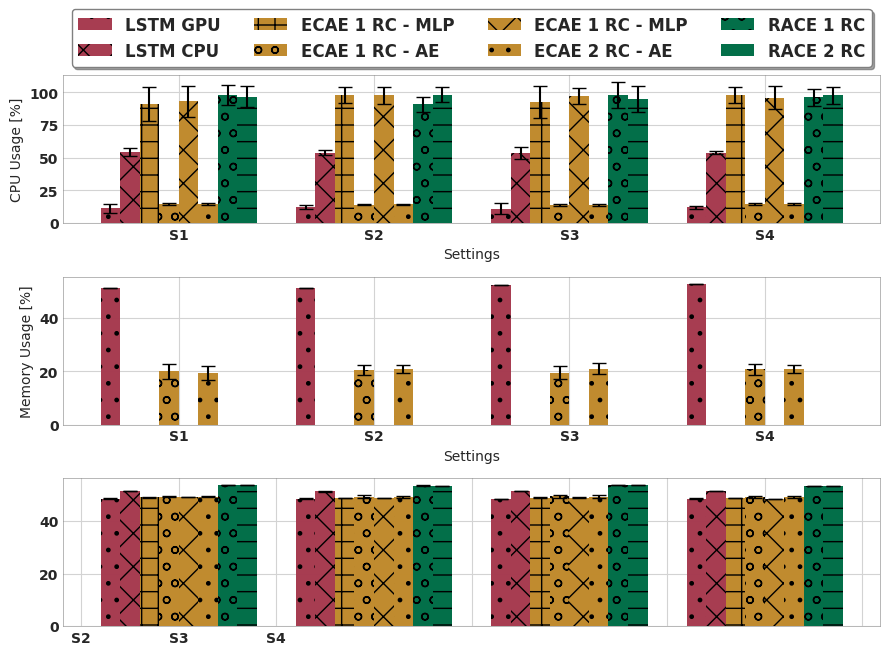

In [67]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 6))
fig.subplots_adjust(hspace=0.5)

settings = ["S1", "S2", "S3", "S4"]

# Air Quality Plot
x = np.arange(len(settings))  # the label locations
width = 0.1  # the width of the bars

ax1.bar(x - width * 3.5, avg_cpu_usage_lstm_gpu, width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 2.5, avg_cpu_usage_lstm_cpu, width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 1.5, avg_cpu_usage_ecae_1layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[4], alpha=0.99)
ax1.bar(x - width * 0.5, avg_cpu_usage_ecae_1layers_ae, width, label='ECAE 1 RC - AE', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x + width * 0.5, avg_cpu_usage_ecae_2layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[1], alpha=0.99)
ax1.bar(x + width * 1.5, avg_cpu_usage_ecae_2layers_ae, width, label='ECAE 2 RC - AE', color=dark_colors[3], hatch=hatchs[0], alpha=0.99)
ax1.bar(x + width * 2.5, avg_cpu_usage_race_step2_1layers, width, label="RACE 1 RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 3.5, avg_cpu_usage_race_step2_2layers, width, label="RACE 2 RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax1.errorbar(x - width * 3.5, avg_cpu_usage_lstm_gpu, yerr=std_cpu_usage_lstm_gpu, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x - width * 2.5, avg_cpu_usage_lstm_cpu, yerr=std_cpu_usage_lstm_cpu, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x - width * 1.5, avg_cpu_usage_ecae_1layers_mlp, yerr=std_cpu_usage_ecae_1layers_mlp /2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x - width * 0.5, avg_cpu_usage_ecae_1layers_ae, yerr=std_cpu_usage_ecae_1layers_ae /2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 0.5, avg_cpu_usage_ecae_2layers_mlp, yerr=std_cpu_usage_ecae_2layers_mlp/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 1.5, avg_cpu_usage_ecae_2layers_ae, yerr=std_cpu_usage_ecae_2layers_ae/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 2.5, avg_cpu_usage_race_step2_1layers, yerr=std_cpu_usage_race_step2_1layers/2, fmt='none', ecolor='black', capsize=5)
ax1.errorbar(x + width * 3.5, avg_cpu_usage_race_step2_2layers, yerr=std_cpu_usage_race_step2_1layers/2, fmt='none', ecolor='black', capsize=5)

ax2.bar(x - width * 3.5, avg_gpu_usage_lstm_gpu, width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 2.5, avg_gpu_usage_lstm_cpu, width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 1.5, avg_gpu_usage_ecae_1layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[4], alpha=0.99)
ax2.bar(x - width * 0.5, avg_gpu_usage_ecae_1layers_ae, width, label='ECAE 1 RC - AE', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax2.bar(x + width * 0.5, avg_gpu_usage_ecae_2layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[1], alpha=0.99)
ax2.bar(x + width * 1.5, avg_gpu_usage_ecae_2layers_ae, width, label='ECAE 2 RC - AE', color=dark_colors[3], hatch=hatchs[0], alpha=0.99)
ax2.bar(x + width * 2.5, avg_gpu_usage_race_step2_1layers, width, label='RACE 1 RC', color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax2.bar(x + width * 3.5, avg_gpu_usage_race_step2_2layers, width, label='RACE 2 RC', color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax2.errorbar(x - width * 3.5, avg_gpu_usage_lstm_gpu, yerr=std_gpu_usage_lstm_gpu, fmt='none', ecolor='black', capsize=5)
# ax2.errorbar(x - width * 2.5, avg_gpu_usage_lstm_cpu, yerr=std_gpu_usage_lstm_cpu, fmt='none', ecolor='black', capsize=5)
# ax2.errorbar(x - width * 1.5, avg_gpu_usage_ecae_1layers_mlp, yerr=std_gpu_usage_ecae_1layers_mlp /2, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x - width * 0.5, avg_gpu_usage_ecae_1layers_ae, yerr=std_gpu_usage_ecae_1layers_ae /2, fmt='none', ecolor='black', capsize=5)
# ax2.errorbar(x + width * 0.5, avg_gpu_usage_ecae_2layers_mlp, yerr=std_gpu_usage_ecae_2layers_mlp/2, fmt='none', ecolor='black', capsize=5)
ax2.errorbar(x + width * 1.5, avg_gpu_usage_ecae_2layers_ae, yerr=std_gpu_usage_ecae_2layers_ae/2, fmt='none', ecolor='black', capsize=5)
# ax2.errorbar(x + width * 2.5, avg_gpu_usage_race_step2_2layers, yerr=std_gpu_usage_ecae_1layers_ae/2, fmt='none', ecolor='black', capsize=5)
# ax2.errorbar(x + width * 3.5, avg_gpu_usage_race_step2_2layers, yerr=std_gpu_usage_ecae_1layers_ae/2, fmt='none', ecolor='black', capsize=5)

ax3.bar(x - width * 3.5, avg_memory_usage_lstm_gpu, width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax3.bar(x - width * 2.5, avg_memory_usage_lstm_cpu, width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax3.bar(x - width * 1.5, avg_memory_usage_ecae_1layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[4], alpha=0.99)
ax3.bar(x - width * 0.5, avg_memory_usage_ecae_1layers_ae, width, label='ECAE 1 RC - AE', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax3.bar(x + width * 0.5, avg_memory_usage_ecae_2layers_mlp, width, label='ECAE 1 RC - MLP', color=dark_colors[3], hatch=hatchs[1], alpha=0.99)
ax3.bar(x + width * 1.5, avg_memory_usage_ecae_2layers_ae, width, label='ECAE 1 RC - AE', color=dark_colors[3], hatch=hatchs[0], alpha=0.99)
ax3.bar(x + width * 2.5, avg_memory_usage_race_step2_1layers, width, label='RACE 1 RC', color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax3.bar(x + width * 3.5, avg_memory_usage_race_step2_2layers, width, label='RACE 2 RC', color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax3.errorbar(x - width * 3.5, avg_memory_usage_lstm_gpu, yerr=std_memory_usage_lstm_gpu, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x - width * 2.5, avg_memory_usage_lstm_cpu, yerr=std_memory_usage_lstm_cpu, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x - width * 1.5, avg_memory_usage_ecae_1layers_mlp, yerr=std_memory_usage_ecae_1layers_mlp, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x - width * 0.5, avg_memory_usage_ecae_1layers_ae, yerr=std_memory_usage_ecae_1layers_ae, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x + width * 0.5, avg_memory_usage_ecae_2layers_mlp, yerr=std_memory_usage_ecae_2layers_mlp, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x + width * 1.5, avg_memory_usage_ecae_2layers_ae, yerr=std_memory_usage_ecae_2layers_ae, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x + width * 2.5, avg_memory_usage_race_step2_1layers, yerr=std_memory_usage_race_step2_1layers, fmt='none', ecolor='black', capsize=5)
ax3.errorbar(x + width * 3.5, avg_memory_usage_race_step2_2layers, yerr=std_memory_usage_race_step2_2layers, fmt='none', ecolor='black', capsize=5)
        
ax1.set_xticks(x)
ax1.set_xticklabels(settings)
ax1.set_xlabel('Settings')
ax1.set_ylabel('CPU Usage [%]')

ax2.set_xticks(x)
ax2.set_xticklabels(settings)
ax2.set_xlabel('Settings')
ax2.set_ylabel('GPU Usage [%]')

ax3.set_xticklabels(settings)
ax2.set_xlabel('Settings')
ax2.set_ylabel('Memory Usage [%]')

# tight layout
plt.tight_layout()
ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=True, ncol=4)


# save as pdf
fig.savefig("nasa_cpu_gpu_mem_usage.pdf", bbox_inches='tight', dpi=300)

# show legend
# ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

## Energy consumption and peacks

### E consumption

In [68]:
avg_tot_e_consumption_lstm_gpu = []
avg_tot_e_consumption_lstm_cpu = []
avg_tot_e_consumption_ecae_1layers = []
avg_tot_e_consumption_ecae_2layers = []
avg_tot_e_consumption_race_step2_1layers = []
avg_tot_e_consumption_race_step2_2layers = []

std_tot_e_consumption_lstm_gpu = []
std_tot_e_consumption_lstm_cpu = []
std_tot_e_consumption_ecae_1layers = []
std_tot_e_consumption_ecae_2layers = []
std_tot_e_consumption_race_step2_1layers = []
std_tot_e_consumption_race_step2_2layers = []

avg_tot_e_consumption_lstm_gpu.append(resources_LSTM_S1_gpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_gpu.append(resources_LSTM_S2_gpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_gpu.append(resources_LSTM_S3_gpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_gpu.append(resources_LSTM_S4_gpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_cpu.append(resources_LSTM_S1_cpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_cpu.append(resources_LSTM_S2_cpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_cpu.append(resources_LSTM_S3_cpu["total_energy_consumption"])
avg_tot_e_consumption_lstm_cpu.append(resources_LSTM_S4_cpu["total_energy_consumption"])

avg_tot_e_consumption_ecae_1layers.append(resources_ECAE_S1_1layers_mlp["total_energy_consumption"] + resources_ECAE_S1_1layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_1layers.append(resources_ECAE_S2_1layers_mlp["total_energy_consumption"] + resources_ECAE_S2_1layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_1layers.append(resources_ECAE_S3_1layers_mlp["total_energy_consumption"] + resources_ECAE_S3_1layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_1layers.append(resources_ECAE_S4_1layers_mlp["total_energy_consumption"] + resources_ECAE_S4_1layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_2layers.append(resources_ECAE_S1_2layers_mlp["total_energy_consumption"] + resources_ECAE_S1_2layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_2layers.append(resources_ECAE_S2_2layers_mlp["total_energy_consumption"] + resources_ECAE_S2_2layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_2layers.append(resources_ECAE_S3_2layers_mlp["total_energy_consumption"] + resources_ECAE_S3_2layers_ae["total_energy_consumption"])
avg_tot_e_consumption_ecae_2layers.append(resources_ECAE_S4_2layers_mlp["total_energy_consumption"] + resources_ECAE_S4_2layers_ae["total_energy_consumption"])
avg_tot_e_consumption_race_step2_1layers.append(resources_RACE_S1_step2_layer1["total_energy_consumption"])
avg_tot_e_consumption_race_step2_1layers.append(resources_RACE_S2_step2_layer1["total_energy_consumption"])
avg_tot_e_consumption_race_step2_1layers.append(resources_RACE_S3_step2_layer1["total_energy_consumption"])
avg_tot_e_consumption_race_step2_1layers.append(resources_RACE_S4_step2_layer1["total_energy_consumption"])
avg_tot_e_consumption_race_step2_2layers.append(resources_RACE_S1_step2_layer2["total_energy_consumption"])
avg_tot_e_consumption_race_step2_2layers.append(resources_RACE_S2_step2_layer2["total_energy_consumption"])
avg_tot_e_consumption_race_step2_2layers.append(resources_RACE_S3_step2_layer2["total_energy_consumption"])
avg_tot_e_consumption_race_step2_2layers.append(resources_RACE_S4_step2_layer2["total_energy_consumption"])

std_tot_e_consumption_lstm_gpu.append(resources_LSTM_S1_gpu["total_energy_consumption"])
std_tot_e_consumption_lstm_gpu.append(resources_LSTM_S2_gpu["total_energy_consumption"])
std_tot_e_consumption_lstm_gpu.append(resources_LSTM_S3_gpu["total_energy_consumption"])
std_tot_e_consumption_lstm_gpu.append(resources_LSTM_S4_gpu["total_energy_consumption"])
std_tot_e_consumption_lstm_cpu.append(resources_LSTM_S1_cpu["total_energy_consumption"])
std_tot_e_consumption_lstm_cpu.append(resources_LSTM_S2_cpu["total_energy_consumption"])
std_tot_e_consumption_lstm_cpu.append(resources_LSTM_S3_cpu["total_energy_consumption"])
std_tot_e_consumption_lstm_cpu.append(resources_LSTM_S4_cpu["total_energy_consumption"])
std_tot_e_consumption_ecae_1layers.append((resources_ECAE_S1_1layers_mlp["total_energy_consumption"] + resources_ECAE_S1_1layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_1layers.append((resources_ECAE_S2_1layers_mlp["total_energy_consumption"] + resources_ECAE_S2_1layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_1layers.append((resources_ECAE_S3_1layers_mlp["total_energy_consumption"] + resources_ECAE_S3_1layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_1layers.append((resources_ECAE_S4_1layers_mlp["total_energy_consumption"] + resources_ECAE_S4_1layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_2layers.append((resources_ECAE_S1_2layers_mlp["total_energy_consumption"] + resources_ECAE_S1_2layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_2layers.append((resources_ECAE_S2_2layers_mlp["total_energy_consumption"] + resources_ECAE_S2_2layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_2layers.append((resources_ECAE_S3_2layers_mlp["total_energy_consumption"] + resources_ECAE_S3_2layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_ecae_2layers.append((resources_ECAE_S4_2layers_mlp["total_energy_consumption"] + resources_ECAE_S4_2layers_ae["total_energy_consumption"]) / 2)
std_tot_e_consumption_race_step2_1layers.append(resources_RACE_S1_step2_layer1["total_energy_consumption"])
std_tot_e_consumption_race_step2_1layers.append(resources_RACE_S2_step2_layer1["total_energy_consumption"])
std_tot_e_consumption_race_step2_1layers.append(resources_RACE_S3_step2_layer1["total_energy_consumption"])
std_tot_e_consumption_race_step2_1layers.append(resources_RACE_S1_step2_layer1["total_energy_consumption"])
std_tot_e_consumption_race_step2_2layers.append(resources_RACE_S1_step2_layer2["total_energy_consumption"])
std_tot_e_consumption_race_step2_2layers.append(resources_RACE_S2_step2_layer2["total_energy_consumption"])
std_tot_e_consumption_race_step2_2layers.append(resources_RACE_S3_step2_layer2["total_energy_consumption"])
std_tot_e_consumption_race_step2_2layers.append(resources_RACE_S1_step2_layer2["total_energy_consumption"])

findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

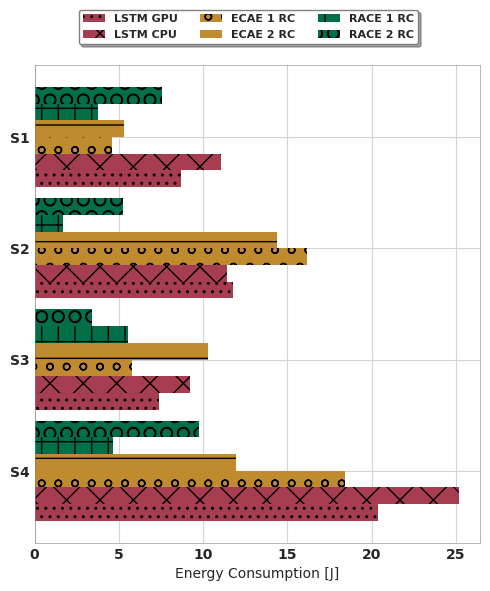

In [69]:
import matplotlib.pyplot as plt
import numpy as np

hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
]


categories = settings
y_pos = np.arange(len(categories))

# Plot
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 6))

# Clustered bars
ax.barh(y_pos + bar_width * 2.5, avg_tot_e_consumption_lstm_gpu, bar_width, label='LSTM GPU', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax.barh(y_pos + bar_width * 1.5, avg_tot_e_consumption_lstm_cpu, bar_width, label='LSTM CPU', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax.barh(y_pos + bar_width * 0.5, avg_tot_e_consumption_ecae_1layers, bar_width, label='ECAE 1 RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax.barh(y_pos - bar_width * 0.5, avg_tot_e_consumption_ecae_2layers, bar_width, label='ECAE 2 RC', color=dark_colors[3], hatch=hatchs[3], alpha=0.99)
ax.barh(y_pos - bar_width * 1.5, avg_tot_e_consumption_race_step2_1layers, bar_width, label='RACE 1 RC', color=dark_colors[2], hatch=hatchs[4], alpha=0.99)
ax.barh(y_pos - bar_width * 2.5, avg_tot_e_consumption_race_step2_2layers, bar_width, label='RACE 2 RC', color=dark_colors[2], hatch=hatchs[5], alpha=0.99)
# Labels and title
ax.set_xlabel('Energy Consumption [J]')
# ax.set_title('Power Consumption by Search Strategy and Dataset')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()
ax.legend(loc='center', bbox_to_anchor=(0.48, 1.08), fancybox=True, shadow=True, ncol=3, fontsize=8)

# Show plot
plt.tight_layout()
# plt.show()

plt.savefig("nasa_power_consumption.pdf", bbox_inches='tight')


In [70]:
resources_LSTM_S1_gpu

{'tot_time': 81.51510167121887,
 'cpu_usage_percentage_mean': 11.230465995942424,
 'cpu_usage_percentage_std': 1.282430235548103,
 'gpu_usage_percentage_mean': 51.160493827160494,
 'gpu_usage_percentage_std': 9.127743239652942,
 'memory_usage_mean': 48.49805948516242,
 'memory_usage_std': 0.1194908723957128,
 'max_cpu_power': 75.06250900000305,
 'max_gpu_power': 102.98,
 'total_energy_consumption': 8.668004122634526,
 'cpu_energy_consumption': 3.742445778144791,
 'gpu_energy_consumption': 4.925558344489733}

In [71]:
resources_RACE_S1_step2_layer1

{'tot_time': 39.345261335372925,
 'cpu_usage_percentage_mean': 97.7664611887627,
 'cpu_usage_percentage_std': 13.588122684951928,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.553394058820956,
 'memory_usage_std': 0.02673427733609445,
 'max_cpu_power': 142.14021700000012,
 'max_gpu_power': 9.36,
 'total_energy_consumption': 3.740584028959255,
 'cpu_energy_consumption': 3.5177143191122813,
 'gpu_energy_consumption': 0.22286970984697338}

In [72]:
resources_RACE_S1_step2_layer2

{'tot_time': 77.58778548240662,
 'cpu_usage_percentage_mean': 96.64154144428434,
 'cpu_usage_percentage_std': 15.700198602843425,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.55518150138914,
 'memory_usage_std': 0.03723768729287233,
 'max_cpu_power': 142.13171800000055,
 'max_gpu_power': 11.29,
 'total_energy_consumption': 7.555326793676929,
 'cpu_energy_consumption': 7.109199340371208,
 'gpu_energy_consumption': 0.4461274533057213}

<!-- {'tot_time': 77.58778548240662,
 'cpu_usage_percentage_mean': 96.64154144428434,
 'cpu_usage_percentage_std': 15.700198602843425,
 'gpu_usage_percentage_mean': 0.0,
 'gpu_usage_percentage_std': 0.0,
 'memory_usage_mean': 53.55518150138914,
 'memory_usage_std': 0.03723768729287233,
 'max_cpu_power': 142.13171800000055,
 'max_gpu_power': 11.29,
 'total_energy_consumption': 7.555326793676929,
 'cpu_energy_consumption': 7.109199340371208,
 'gpu_energy_consumption': 0.4461274533057213} -->